# TD3 : Spectral clustering and random graphs

In [1]:
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

## Implementation of spectral clustering on small graph

### Graph for this exercise

In [2]:
A = np.zeros((30, 30))

A[0:10, 0:10] = 1
A[10:20, 10:20] = 1
A[20:, 20:] = 1
A[9, 10] = A[10, 9] = A[19,20] = A[20, 19] = 1

W = 3 * A

In [3]:
def get_degree(adjacency_matrix : np.array):
    """Return degree matrix of a graph"""
    sum = np.sum(adjacency_matrix, axis = 0)
    return np.diag(sum)

D = get_degree(A)
Dw = get_degree(W)

In [4]:
L = D - A
Lw = Dw - W
sd = np.sqrt(A.sum(axis=1))
Ln = np.identity(30) - A / sd[:, None] / sd[None, :]

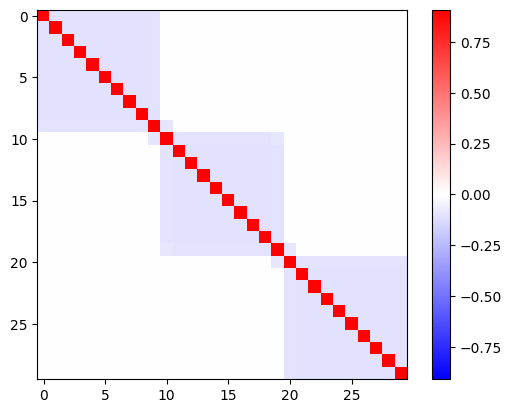

In [5]:
mpl.interactive(True)
plt.imshow(Ln, cmap="bwr", vmin=-np.abs(Ln).max(), vmax = np.abs(Ln).max())
plt.colorbar()

### Un-normalize spectral clustering

In [24]:
M = Lw
lambd, P = sp.linalg.eigh(M)

In [31]:
K = 3
u = P[:, :K]
v = u

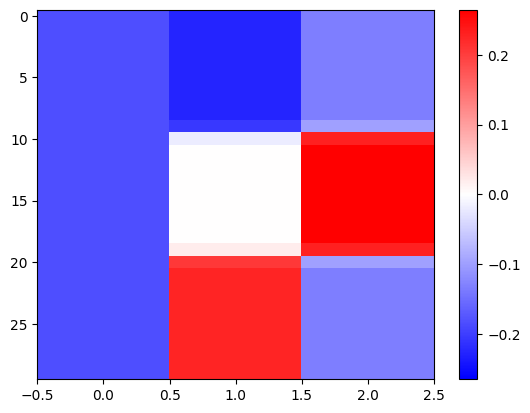

In [32]:
mpl.interactive(True)
plt.imshow(u, cmap="bwr", vmin=-np.abs(u).max(), vmax = np.abs(u).max(), aspect='auto')
plt.colorbar()

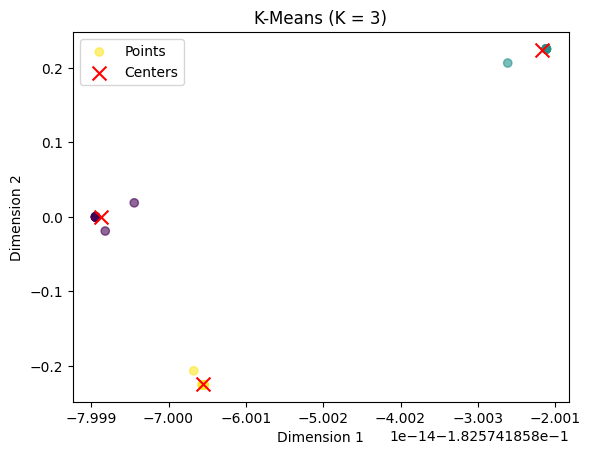

In [33]:
kmeans = KMeans(K, random_state=42)
labels = kmeans.fit_predict(v)
centroids = kmeans.cluster_centers_

plt.scatter(v[:, 0], v[:, 1], c=labels, cmap="viridis", marker="o", alpha=0.6, label="Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", marker = "x", s=100, label = "Centers")
plt.title(f"K-Means (K = {K})")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


We can observe 3 clusters. At the top, we have a group, in the middle, it's the class 2 and at the bottom, we have another cluster. Every points are grouped at the same point except one which makes the link with another cluster

### Nj-normalized spectral clustering

In [10]:
M = Ln
lambd, P = sp.linalg.eigh(M)

In [11]:
K = 3
u = P[:, :3]
u = u / np.linalg.norm(u, axis=0)

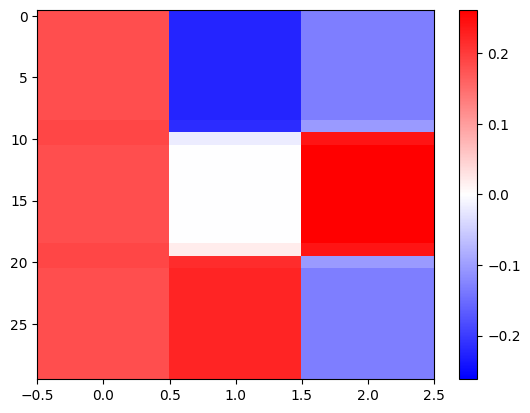

In [12]:
mpl.interactive(True)
plt.imshow(u, cmap="bwr", vmin=-np.abs(u).max(), vmax = np.abs(u).max(), aspect='auto')
plt.colorbar()

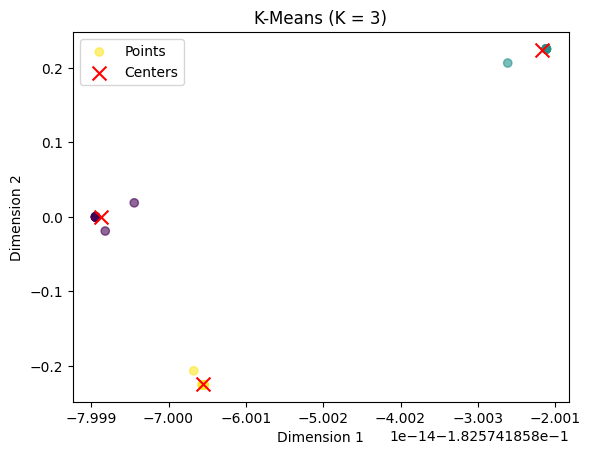

In [13]:
kmeans = KMeans(K, random_state=42)
labels = kmeans.fit_predict(v)
centroids = kmeans.cluster_centers_

plt.scatter(v[:, 0], v[:, 1], c=labels, cmap="viridis", marker="o", alpha=0.6, label="Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", marker = "x", s=100, label = "Centers")
plt.title(f"K-Means (K = {K})")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


### Absolute eigenvalues spectral clustering

In [14]:
M = np.identity(30) - Ln
lambd, P = sp.linalg.eigh(M)


In [15]:
K = 3
u = P[:, :3]
u = u / np.linalg.norm(u, axis=0)

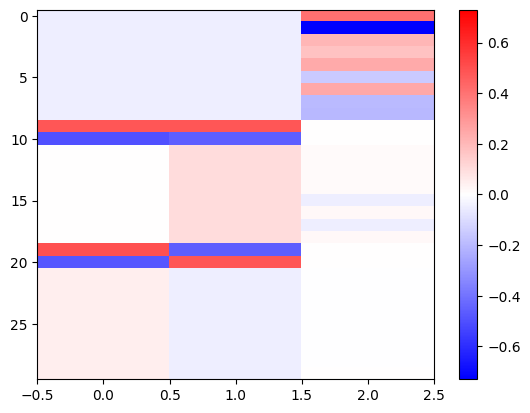

In [16]:
mpl.interactive(True)
plt.imshow(u, cmap="bwr", vmin=-np.abs(u).max(), vmax = np.abs(u).max(), aspect='auto')
plt.colorbar()

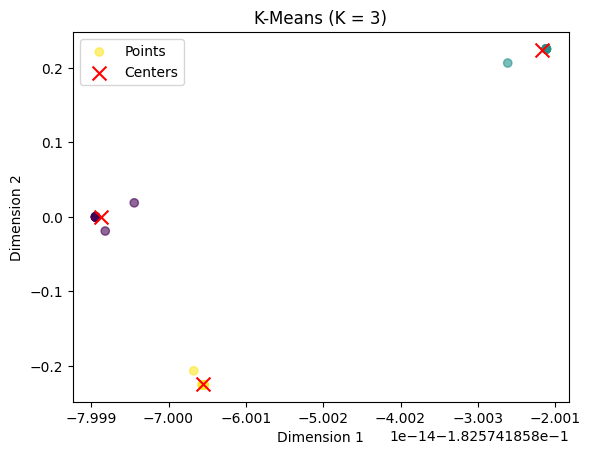

In [17]:
kmeans = KMeans(K, random_state=42)
labels = kmeans.fit_predict(v)
centroids = kmeans.cluster_centers_

plt.scatter(v[:, 0], v[:, 1], c=labels, cmap="viridis", marker="o", alpha=0.6, label="Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", marker = "x", s=100, label = "Centers")
plt.title(f"K-Means (K = {K})")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


## Random networks / graphs

### Latent Position Model (LPM)

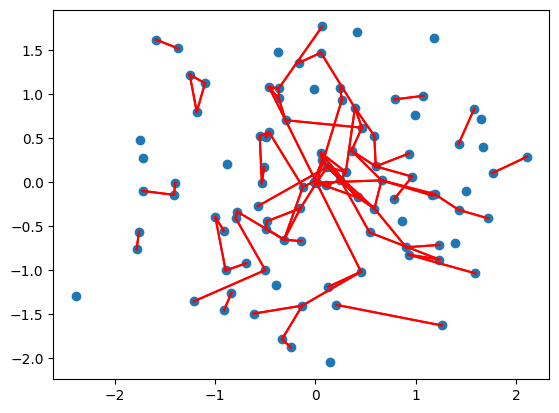

In [18]:
def LPM(n_nodes = 10, space_latent_dim = 2, lambd = 1, self_loops = False):
    """Generate LPM"""
    # Latent distribution
    Z = np.random.normal(0, 1, size = (n_nodes, space_latent_dim))
    # Norm difference
    dist = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Z)) # Or dist = ((Z[:, None, :] - Z[None, :, :])**2).sum(axis=-1)**0.5
    # Compute theorical probabilities to have link
    prob_link = np.exp(-lambd * dist)
    # Compute adjacency matrix
    X = np.random.uniform(size=(n_nodes, n_nodes)) < prob_link
    if not self_loops:
        idx = np.triu_indices_from(X, 1)
        X_r = np.zeros(shape=(n_nodes, n_nodes))
        X_r[idx[0], idx[1]] = X[idx[0], idx[1]]
        X_r += X_r.T
        X = X_r
    return Z, X

n_nodes = 100
lambd = 5
Z, X = LPM(n_nodes, lambd=lambd)

plt.plot(Z[:, 0], Z[:, 1], "o")
for i in range(n_nodes):
    for j in range(n_nodes):
        if X[i, j]:
            plt.plot(Z[(i,j), 0], Z[(i, j), 1], 'r-')
    




### Stochastic Block Model (SBM)

In [19]:
def SBM(n_nodes = 10, n_classes = 3, prob_classes = None, alpha = None, self_loop = False):
    """Generate SBM"""
    if prob_classes is None:
        prob_classes = np.ones(shape=n_classes) / n_classes
    if alpha is None:
        alpha = np.ones(shape=(n_classes, n_classes)) / 2
    # Create Z, class vector
    Z = np.random.choice([i for i in range(n_classes)], size=n_nodes, p=prob_classes)
    # Generate bernouilli law
    alpha_expanded = alpha[Z][:, Z]
    X = np.random.binomial(n=1, p=alpha_expanded)
    if not self_loop:
        np.fill_diagonal(X, 0)
    return Z, X

Z, X = SBM(n_nodes = 10, n_classes=3)

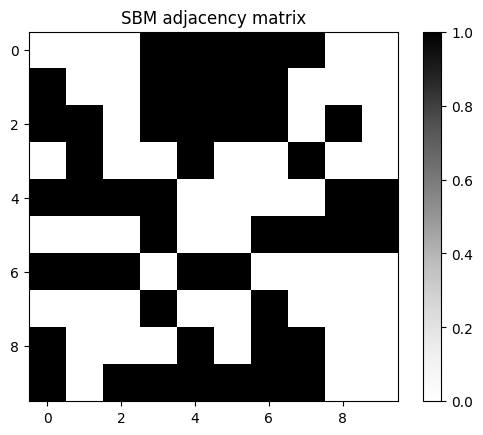

In [20]:
plt.imshow(X, cmap="Greys", vmin=0, vmax=1)
plt.colorbar()
plt.title("SBM adjacency matrix")
plt.show()